# Data analysis on thermal phase 2+1D CDT

Author: Seda den Boer

Date: 04/04/2024

In [88]:
# Load packages
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Experiment parameters

In [89]:
chains = 5
k0_values = np.arange(0.0, 8.0, 1.0)
T = 3
thermal_sweeps = 100
sweeps = 0
target_volume = 3000
ksteps = 300000

# k0 to make plots for
k0 = 5.0

## $k_3$

### Critical $k_3$

In [90]:
last_k3 = {k: [] for k in k0_values}

for k in k0_values:
    for chain in range(chains):
        k = float(k)
        filepath = f'measurements/k0={k}/T{T}_k0={k}_tswps={thermal_sweeps}_swps={sweeps}_kstps={ksteps}_chain={chain}_k3_values.npy'
        k3_values = np.load(filepath)

        # Get final value in the dataset
        last_k3[k].append(k3_values[-1])
    
# Make it a df 
df_critical_k3 = pd.DataFrame(last_k3).T
df_critical_k3.index.name = 'k0'
df_critical_k3.columns.name = 'chain'
df_critical_k3['mean'] = df_critical_k3.mean(axis=1)
df_critical_k3['std'] = df_critical_k3.std(axis=1)
df_critical_k3

chain,0,1,2,3,4,mean,std
k0,,,,,,,
0.0,0.98382,0.95398,0.95790,0.95410,0.95300,0.960560,0.011750
1.0,1.07320,1.06920,1.06610,1.13390,1.07028,1.082536,0.025782
2.0,1.21648,1.21648,1.22130,1.21718,1.22598,1.219484,0.003711
3.0,1.37940,1.38190,1.37850,1.38758,1.38280,1.382036,0.003187
4.0,1.52896,1.52302,1.51548,1.49158,1.52282,1.516372,0.013112
5.0,1.69202,1.69886,1.68512,1.70268,1.68652,1.693040,0.006828
6.0,1.88914,1.88828,1.89000,1.88850,1.88746,1.888676,0.000853
7.0,2.14012,2.13748,2.13934,2.13922,2.13976,2.139184,0.000910


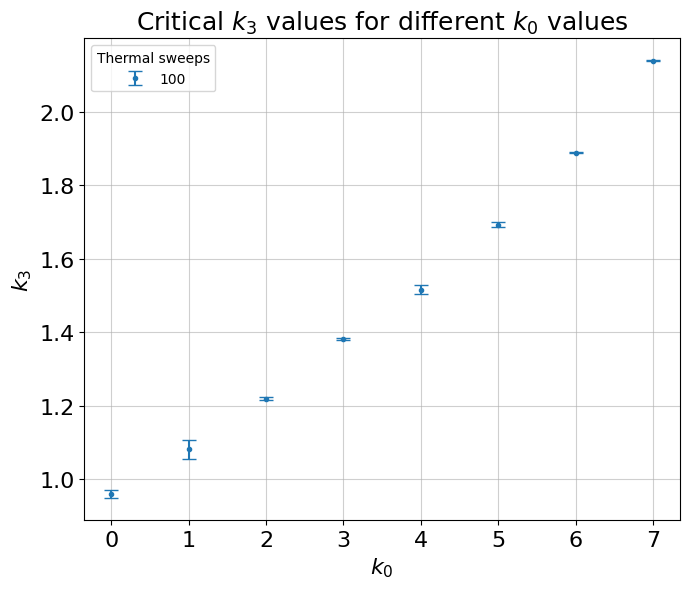

In [91]:
# Plot critical k3 with markers and interpolated line
plt.figure(figsize=(7, 6))
plt.errorbar(df_critical_k3.index, df_critical_k3['mean'], yerr=df_critical_k3['std'], fmt='.', capsize=5, xerr=None, label=100)
plt.title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Thermal sweeps', fancybox=True)
plt.tight_layout()
savepath = f'plots/k3_tuning/critical_k3_values.png'
if not os.path.exists('plots/k3_tuning'):
    os.makedirs('plots/k3_tuning')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### $k_3$ over time

In [92]:
filepaths_k3 = [f'measurements/k0={k0}/T{T}_k0={k0}_tswps={thermal_sweeps}_swps={sweeps}_kstps={ksteps}_chain={chain}_k3_values.npy' for chain in range(chains)]
k3_values = []
for filepath in filepaths_k3:
    k3_values.append(np.load(filepath))

# Make it a df to plot easily the mean and std
df_k3 = pd.DataFrame(k3_values)
# make a column for chain, sweep and the values k3
df_k3 = df_k3.melt(var_name='sweep', value_name='k3', ignore_index=False).reset_index()
# Increase sweep number by 1
df_k3['sweep'] += 1
df_k3

,index,sweep,k3
0,0,1,1.80000
1,1,1,1.80000
2,2,1,1.80000
3,3,1,1.80000
4,4,1,1.80000
...,...,...,...
495,0,100,1.69202
496,1,100,1.69886
497,2,100,1.68512
498,3,100,1.70268


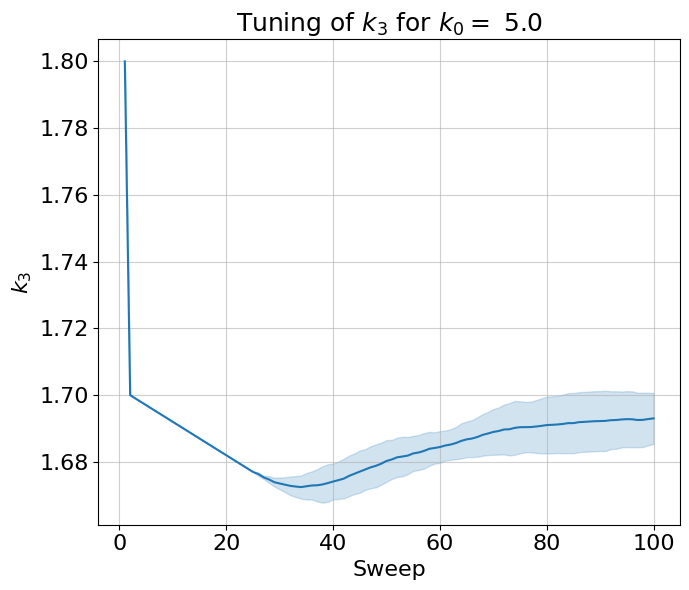

In [93]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_k3, x='sweep', y='k3', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.title(f'Tuning of $k_3$ for $k_0=$ {k0}', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/k3_tuning/k3_tuning_k0={k0}.png'
if not os.path.exists('plots/k3_tuning'):
    os.makedirs('plots/k3_tuning')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Acceptance ratios

In [94]:
filepaths_ar = [f'measurements/k0={k0}/T{T}_k0={k0}_tswps={thermal_sweeps}_swps={sweeps}_kstps={ksteps}_chain={chain}_acceptance_ratios.npy' for chain in range(chains)]
ar_add = []
ar_delete = []
ar_flip = []
ar_shift = []
ar_ishift = []

for filepath in filepaths_ar:
    ar = np.load(filepath)
    ar_add.append(ar[:, 0])
    ar_delete.append(ar[:, 1])
    ar_flip.append(ar[:, 2])
    ar_shift.append(ar[:, 3])
    ar_ishift.append(ar[:, 4])

# Make it a df to plot easily the mean and std
df_ar_add = pd.DataFrame(ar_add)
df_ar_delete = pd.DataFrame(ar_delete)
df_ar_flip = pd.DataFrame(ar_flip)
df_ar_shift = pd.DataFrame(ar_shift)
df_ar_ishift = pd.DataFrame(ar_ishift)

# Make a column for chain, sweep and the values ar
df_ar_add = df_ar_add.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_delete = df_ar_delete.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_flip = df_ar_flip.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_shift = df_ar_shift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_ishift = df_ar_ishift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()

# Increase sweep number by 1
df_ar_add['sweep'] += 1
df_ar_delete['sweep'] += 1
df_ar_flip['sweep'] += 1
df_ar_shift['sweep'] += 1
df_ar_ishift['sweep'] += 1

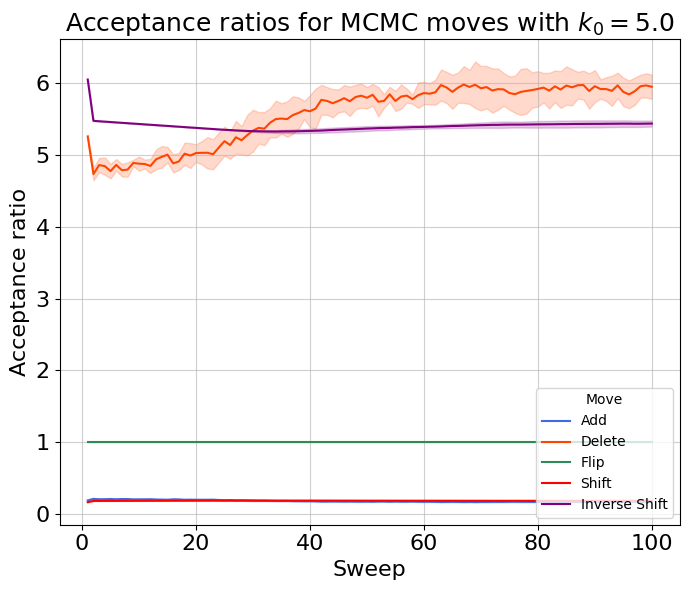

In [95]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='lower right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/acceptance_ratios_k0={k0}.png'
if not os.path.exists('plots/acceptance_ratios'):
    os.makedirs('plots/acceptance_ratios')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## Succes rates

In [96]:
filepaths_successes = [f'measurements/k0={k0}/T{T}_k0={k0}_tswps={thermal_sweeps}_swps={sweeps}_kstps={ksteps}_chain={chain}_successes.npy' for chain in range(chains)]
filepath_fails = [f'measurements/k0={k0}/T{T}_k0={k0}_tswps={thermal_sweeps}_swps={sweeps}_kstps={ksteps}_chain={chain}_fails.npy' for chain in range(chains)]

sr_add = []
sr_delete = []
sr_flip = []
sr_shift = []
sr_ishift = []

for i in range(chains):
    successes = np.load(filepaths_successes[i])
    fails = np.load(filepath_fails[i])
    sr_add.append(successes[:, 0] / (successes[:, 0] + fails[:, 0]))
    sr_delete.append(successes[:, 1] / (successes[:, 1] + fails[:, 1]))
    sr_flip.append(successes[:, 2] / (successes[:, 2] + fails[:, 2]))
    sr_shift.append(successes[:, 3] / (successes[:, 3] + fails[:, 3]))
    sr_ishift.append(successes[:, 4] / (successes[:, 4] + fails[:, 4]))

# Make it a df to plot easily the mean and std
df_sr_add = pd.DataFrame(sr_add)
df_sr_delete = pd.DataFrame(sr_delete)
df_sr_flip = pd.DataFrame(sr_flip)
df_sr_shift = pd.DataFrame(sr_shift)
df_sr_ishift = pd.DataFrame(sr_ishift)

# Make a column for chain, sweep and the values sr
df_sr_add = df_sr_add.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_delete = df_sr_delete.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_flip = df_sr_flip.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_shift = df_sr_shift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_ishift = df_sr_ishift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()

# Increase sweep number by 1
df_sr_add['sweep'] += 1
df_sr_delete['sweep'] += 1
df_sr_flip['sweep'] += 1
df_sr_shift['sweep'] += 1
df_sr_ishift['sweep'] += 1

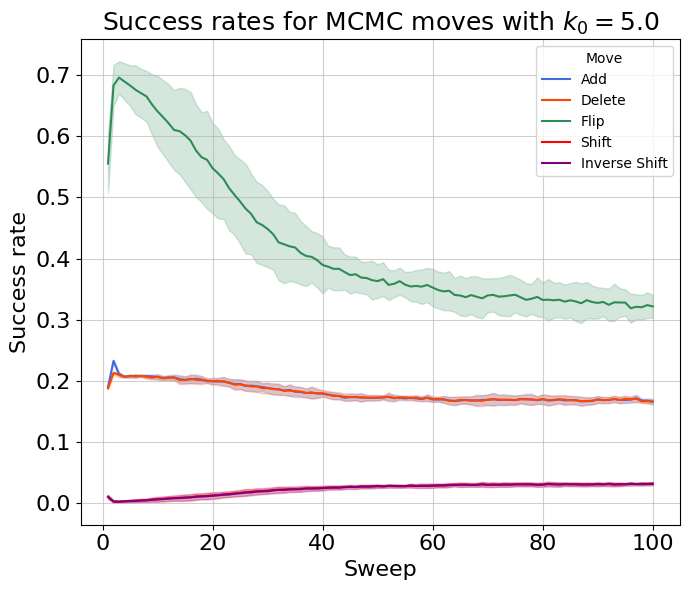

In [97]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/success_rates/success_rates_k0={k0}.png'
if not os.path.exists('plots/success_rates'):
    os.makedirs('plots/success_rates')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

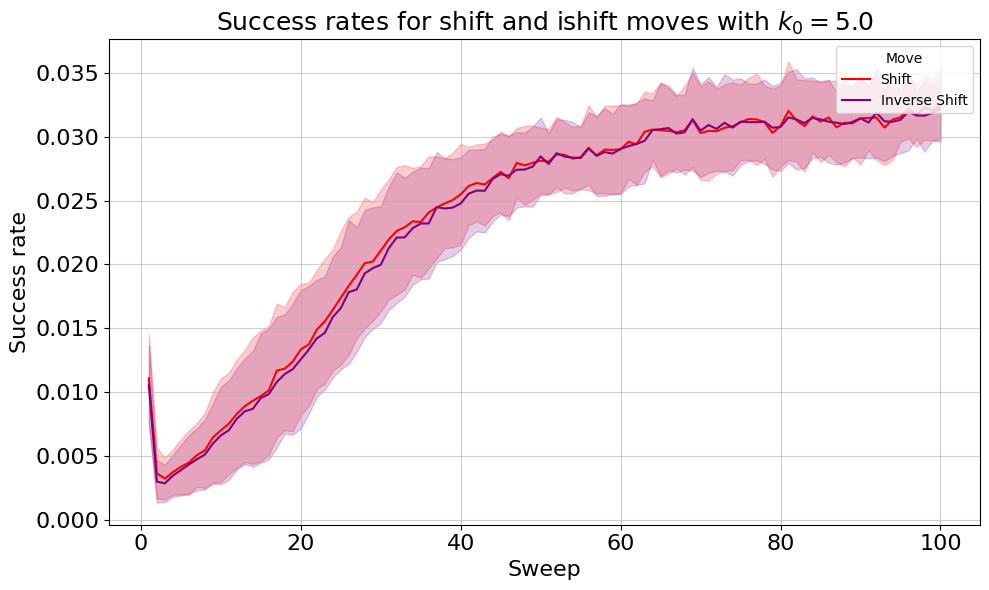

In [98]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for shift and ishift moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/success_rates/shift_ishift_success_rates_k0={k0}.png'
if not os.path.exists('plots/success_rates'):
    os.makedirs('plots/success_rates')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


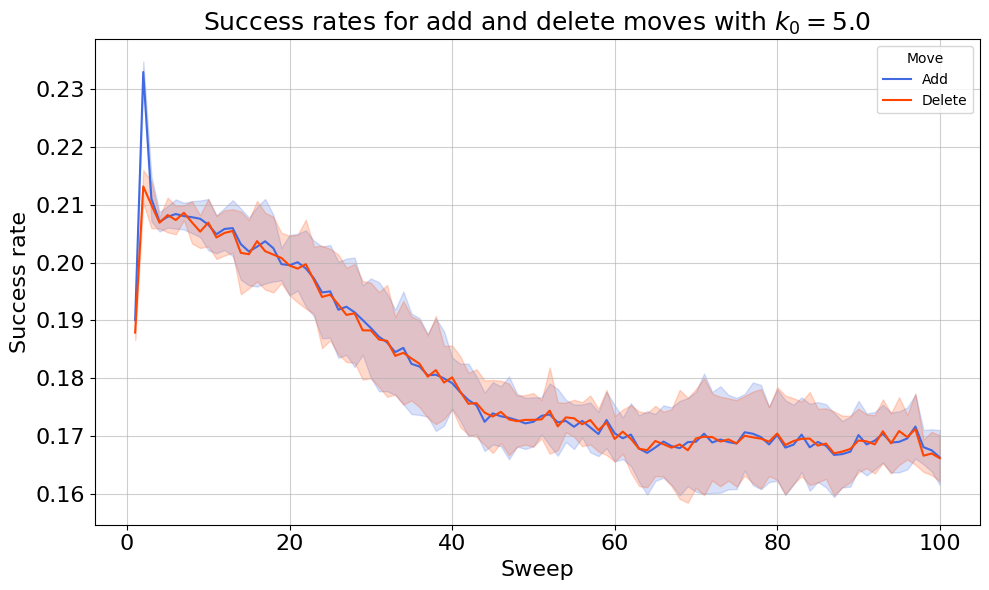

In [99]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for add and delete moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/success_rates/add_delete_success_rates_k0={k0}.png'
if not os.path.exists('plots/success_rates'):
    os.makedirs('plots/success_rates')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## $<N_{22}/N_{31}>$

### Over time

In [100]:
filepaths_n22 = [f'measurements/k0={k0}/T{T}_k0={k0}_tswps={thermal_sweeps}_swps={sweeps}_kstps={ksteps}_chain={chain}_n_tetras_22.npy' for chain in range(chains)]
filepaths_n31 = [f'measurements/k0={k0}/T{T}_k0={k0}_tswps={thermal_sweeps}_swps={sweeps}_kstps={ksteps}_chain={chain}_n_tetras_31.npy' for chain in range(chains)]

n22_n31 = []

for i in range(chains):
    n22 = np.load(filepaths_n22[i])
    n31 = np.load(filepaths_n31[i])
    n22_n31.append(n22 / n31)

# Make it a df to plot easily the mean and std
df_n22_n31 = pd.DataFrame(n22_n31)
df_n22_n31 = df_n22_n31.melt(var_name='sweep', value_name='n22/n31', ignore_index=False).reset_index()
df_n22_n31['sweep'] += 1
df_n22_n31

,index,sweep,n22/n31
0,0,1,1.000000
1,1,1,1.000000
2,2,1,1.000000
3,3,1,1.000000
4,4,1,1.000000
...,...,...,...
500,0,101,0.605894
501,1,101,0.690314
502,2,101,0.593170
503,3,101,0.732702


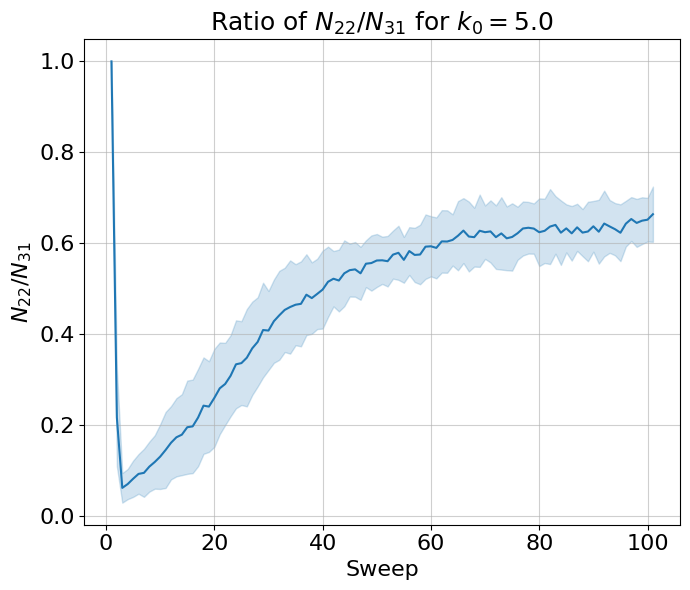

In [101]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_n22_n31, x='sweep', y='n22/n31', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$N_{22}/N_{31}$', fontsize=16)
plt.title(f'Ratio of $N_{{22}}/N_{{31}}$ for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/n22_n31/n22_n31_k0={k0}.png'
if not os.path.exists('plots/n22_n31'):
    os.makedirs('plots/n22_n31')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Curvature

In [102]:
filepaths_curvature = [f'measurements/k0={k0}/T{T}_k0={k0}_tswps={thermal_sweeps}_swps={sweeps}_kstps={ksteps}_chain={chain}_curvature.npy' for chain in range(chains)]
avg_curvature = {chain: [] for chain in range(chains)}
std_curvature = {chain: [] for chain in range(chains)}
curvature = {}

for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    final_added_values = []
    for data in curvature_data:
        added_values = []
        for key, value in data.items():
            # Add the values together in 1 list
            added_values += value

        # Calculate the average and std of the curvature
        avg_curvature[i].append(np.mean(added_values))
        std_curvature[i].append(np.std(added_values))
        

# Make it a df to plot easily the mean and std
df_avg_curvature = pd.DataFrame(avg_curvature).T
df_avg_curvature.index.name = 'chain'
df_avg_curvature.columns.name = 'sweep'
df_avg_curvature = df_avg_curvature.melt(var_name='sweep', value_name='avg_curvature', ignore_index=False).reset_index()
df_avg_curvature



,chain,sweep,avg_curvature
0,0,0,3.600000
1,1,0,3.600000
2,2,0,3.600000
3,3,0,3.600000
4,4,0,3.600000
...,...,...,...
500,0,100,5.976774
501,1,100,5.975543
502,2,100,5.976222
503,3,100,5.976593


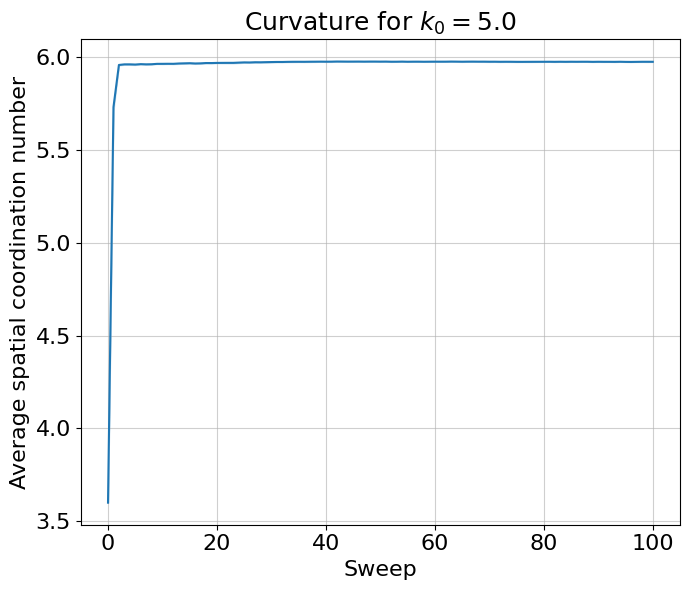

In [103]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_avg_curvature, x='sweep', y='avg_curvature', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Average spatial coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/curvature/curvature_k0={k0}.png'
if not os.path.exists('plots/curvature'):
    os.makedirs('plots/curvature')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

In [104]:
# Add all data for at each sweep together from each chain
tmp1 = []
for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    added = []
    # print(curvature_data)

    for d in curvature_data:
        tmp2 = []
        for value in d.values():
            tmp2 += value
        added.append(tmp2)
    tmp1.append(added)

curvature = [list(sum(zip(*sublists), ())) for sublists in zip(*tmp1)]

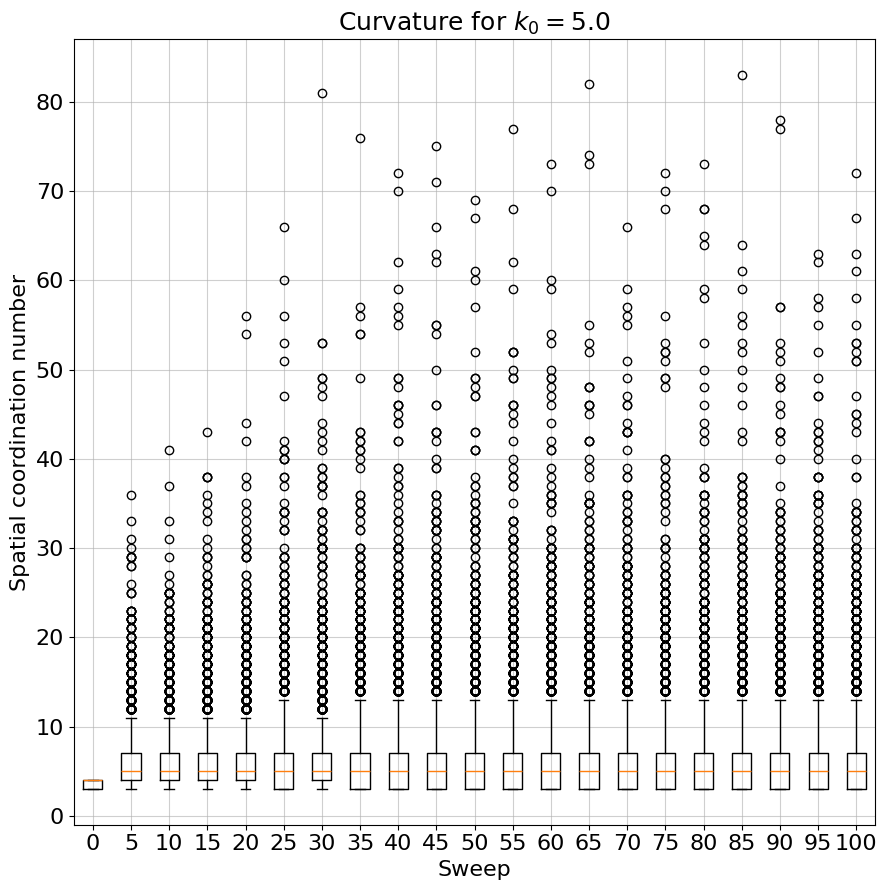

In [106]:
# Plot boxplots of the curvature for every 20 sweeps
sweeps_display = np.arange(0, 101, 5)
boxplot_data = [curvature[i] for i in sweeps_display]
plt.figure(figsize=(9, 9))
plt.boxplot(boxplot_data)
# Set xlabels to the sweep number
plt.xticks(range(1, len(sweeps_display) + 1), sweeps_display)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Spatial coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/curvature/curvature_boxplot_k0={k0}.png'
if not os.path.exists('plots/curvature'):
    os.makedirs('plots/curvature')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Spectral dimension